## COME ON AND SLAM

First we import the photo and start some preprocessing

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from pytesseract import image_to_string
from PIL import Image, ImageFilter

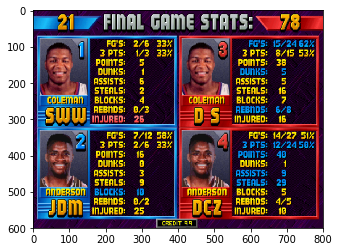

In [148]:
img = cv2.imread('jamscreenshot.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Sections of image

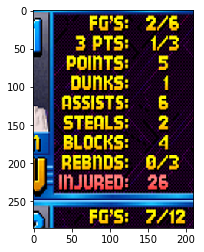

----
FE’S: 2/ 6

3 PTS: 1/3
POINTS: 5
DUNKS: I
ASSISTS: 6
STERLS: 2
BLOCKS: 4
REBHDS:

INJURED:
----


In [160]:
img = Image.open('jamscreenshot.png')
player_1_stats = img.crop((130, 75, 340, 360))
player_1_stats = player_1_stats.filter(ImageFilter.SHARPEN)
plt.imshow(player_1_stats)
plt.show()
print("----")
print(image_to_string(player_1_stats))
print("----")


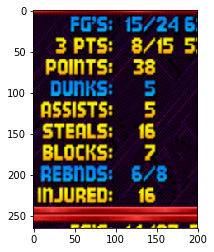

----
FG’S: 15/24 S:
3 PTS: 8/15 5:
FOIHTS: 38
nunns: 5
ﬂSSISTS: 5
STEﬂLS: IS
BLOEKS: 7
“EMS: 6/8
INJURED: 16
----


In [167]:
img = Image.open('jamscreenshot.png')
player_2_stats = img.crop((550, 75, 750, 340))
#player_2_stats = player_2_stats.filter(ImageFilter.SHARPEN)
plt.imshow(player_2_stats)
plt.show()
print("----")
print(image_to_string(player_2_stats))
print("----")

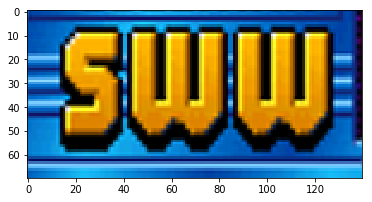

----

----


In [191]:
img = Image.open('jamscreenshot.png')
player_1_name = img.crop((20, 260, 160, 330))
player_1_name = player_1_name.filter(ImageFilter.SHARPEN)
plt.imshow(player_1_name)
plt.show()
print("----")
print(image_to_string(player_1_name))
print("----")

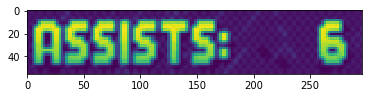

In [100]:
assist_img = cv2.imread('assists.jpg')
assist_gray = cv2.cvtColor(assist_img, cv2.COLOR_RGB2GRAY)
plt.imshow(assist_gray)
plt.show()


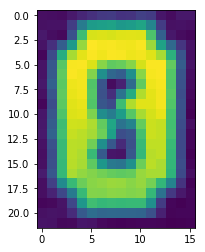

(2, 1, 4, 4, 12)


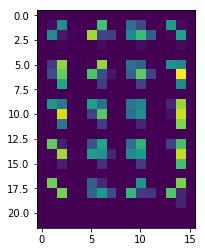

In [166]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

img = cv2.imread('jamTE0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
pix_per_cell = 4
cell_per_block = 4
orient = 12

features, hog_image = hog(gray, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)
plt.imshow(hog_image)
print(features.shape)
plt.show()

In [160]:
# Define a function that takes an image,
# start and stop positions in both x and y,
# window size (x and y dimensions),
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None],
                    xy_window=(32, 32), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step)
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

In [161]:
windows = slide_window(assist_img)
window = windows[0]
print(window)

((0, 0), (32, 32))


In [162]:
def search_windows(img, windows):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        features, hog_image = hog(test_img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)
        on_windows.append(test_img)
    return on_windows

In [163]:
print(assist_gray.shape)
windows = search_windows(assist_gray, windows)
plt.show()


(56, 296)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)
(13, 13, 4, 4, 12)


In [133]:
def best_guess_hog(hog_img, features, hog_list):
    best_guess_acc = -1
    best_guess_value = None
    for i in range(len(hog_list)):
        hog_distance = calc_hog_distance(hog_list[i], features)
        if (hog_distance >= threshold and hog_distance >= best_guess_acc):
            best_guess_acc = hog_distance
            best_guess_value = i
    
    

In [134]:
def map_hog_values(imgs):
    output = []
    for img in imgs:
        hog_f, hog_i = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)
        output.append(hog_f)
    return output

In [167]:
def calc_hog_distance(hogA, hogB):
    pass
    

## Bailing and trying something else

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('assists.jpg')
#image = mpimg.imread('jamscreenshot.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')
templist = ['jamTE6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bbox_list = []
    method = cv2.TM_CCOEFF_NORMED
    for temp in template_list:
        #tmp = mpimg.imread(temp)
        tmp = cv2.imread(temp,0)
        result = cv2.matchTemplate(img_gray, tmp, method)
        w, h = tmp.shape[::-1]
        '''
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        bbox_list.append((top_left, bottom_right))
        '''
        threshold = 0.2
        loc = np.where( result >= threshold)
        for pt in zip(*loc[::-1]):
            cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
        cv2.imwrite('res.png',img)
    # Make a copy of the image to draw on
    # Define an empty list to take bbox coords
    # Iterate through template list
    # Read in templates one by one
    # Use cv2.matchTemplate() to search the image
    #     using whichever of the OpenCV search methods you prefer
    # Use cv2.minMaxLoc() to extract the location of the best match
    # Determine bounding box corners for the match
    # Return the list of bounding boxes
    return bbox_list

bboxes = find_matches(image, templist)
plt.figure(figsize=(10,10))
print(len(bboxes))
result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()